In [39]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("result.csv")

# Define target and predictors
target = "Price"
predictors = [col for col in data.columns if col != target]

# Forward Stepwise Regression function
def forward_stepwise(X, y, significance_level=0.05):
    """
    Perform forward stepwise regression to select significant variables.

    Parameters:
    X (pd.DataFrame): Predictor variables
    y (pd.Series): Target variable
    significance_level (float): Threshold for p-value to add a variable

    Returns:
    list: Selected significant variables
    """
    selected = []
    remaining = list(X.columns)
    while remaining:
        p_values = []
        for candidate in remaining:
            model = sm.OLS(y, sm.add_constant(X[selected + [candidate]])).fit()
            p_values.append((candidate, model.pvalues[candidate]))
        
        # Select the variable with the smallest p-value
        p_values.sort(key=lambda x: x[1])
        best_candidate, best_pvalue = p_values[0]
        if best_pvalue < significance_level:
            selected.append(best_candidate)
            remaining.remove(best_candidate)
            print(f"Variable {best_candidate} added with p-value {best_pvalue:.4f}")
        else:
            break
    return selected

# Separate predictors and target variable
X = data[predictors]
y = data[target]

# Perform forward stepwise regression
selected_features = forward_stepwise(X, y, significance_level=0.05)
print(f"Selected features: {selected_features}")

Variable TotalRevenueLastSeason added with p-value 0.0000
Variable MarketValueOfSquad added with p-value 0.0000
Variable YouthAcademyRating added with p-value 0.0000
Variable TransferIncomeLastSeason added with p-value 0.0000
Variable Effective_Points_Last_Season added with p-value 0.0000
Variable TotalGoalsConcededLastSeason added with p-value 0.0000
Variable MatchesLostLastSeason added with p-value 0.0000
Variable AveragePlayerMarketValue added with p-value 0.0000
Variable TotalGoalsLastSeason added with p-value 0.0000
Variable NumberOfTrophies added with p-value 0.0000
Variable MatchesDrawnLastSeason added with p-value 0.0000
Variable Net_Goal_Difference added with p-value 0.0000
Variable MatchesWonLastSeason added with p-value 0.0000
Variable Net_Wins added with p-value 0.0019
Variable TransferSpendingLastSeason added with p-value 0.0169
Selected features: ['TotalRevenueLastSeason', 'MarketValueOfSquad', 'YouthAcademyRating', 'TransferIncomeLastSeason', 'Effective_Points_Last_Seaso

In [41]:
# Build the final model with selected features
final_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     8036.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:24:25   Log-Likelihood:            -2.8690e+05
No. Observations:               50000   AIC:                         5.738e+05
Df Residuals:                   49984   BIC:                         5.740e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [3]:
# Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X_selected = data[selected_features]
X_with_const = sm.add_constant(X_selected)
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif)

                        Variable         VIF
0                          const  262.211424
1         TotalRevenueLastSeason    1.000303
2             MarketValueOfSquad    1.000254
3             YouthAcademyRating    1.000183
4       TransferIncomeLastSeason    1.000400
5   Effective_Points_Last_Season    1.000234
6   TotalGoalsConcededLastSeason    1.000230
7          MatchesLostLastSeason    1.000342
8       AveragePlayerMarketValue    1.000250
9           TotalGoalsLastSeason    1.000361
10              NumberOfTrophies    1.000269
11        MatchesDrawnLastSeason    1.000301
12           Net_Goal_Difference    1.000305
13          MatchesWonLastSeason    1.000322
14                      Net_Wins    1.000220
15    TransferSpendingLastSeason    1.000489


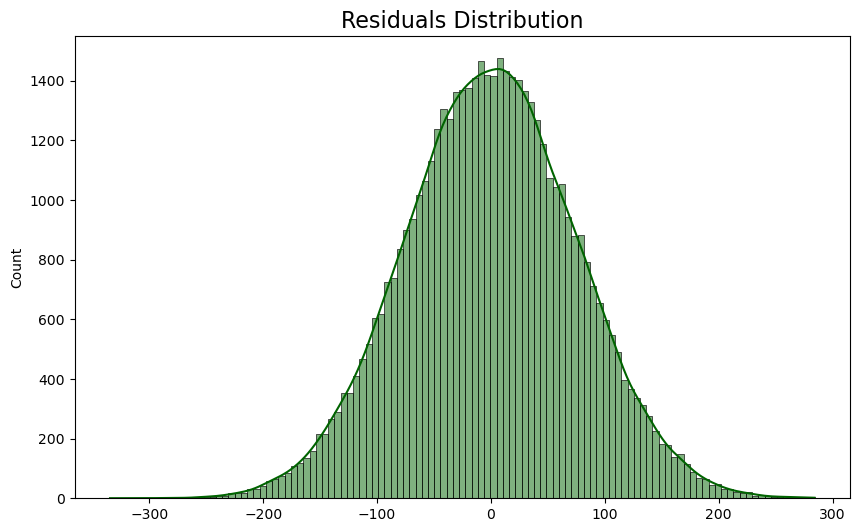

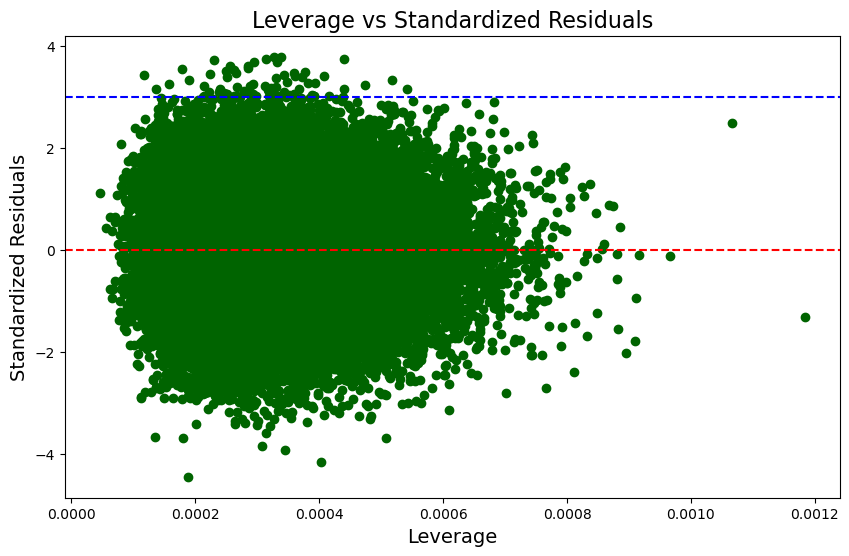

In [43]:
# Diagnostic Checks
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 1. Histogram of Residuals
residuals = final_model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='darkgreen')
plt.title("Residuals Distribution", fontsize=16)
plt.show()

# 2. Residuals vs. Fitted Values
fitted_values = final_model.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='darkgreen')
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals vs. Fitted Values", fontsize=16)
plt.xlabel("Fitted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

# 3. Leverage vs. Standardized Residuals - Identifying Leverage Points
# Get leverage values and standardized residuals
leverage = influence.hat_matrix_diag
standardized_residuals = residuals / np.std(residuals)

# Leverage vs Standardized Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(leverage, standardized_residuals, color='darkgreen')
plt.axhline(y=0, color="red", linestyle="--")
plt.axhline(y=3, color="blue", linestyle="--")
plt.title("Leverage vs Standardized Residuals", fontsize=16)
plt.xlabel("Leverage", fontsize=14)
plt.ylabel("Standardized Residuals", fontsize=14)
plt.show()

In [23]:
# Feature Engineering
# Adding Interaction Terms between TotalRevenueLastSeason and MatchesLostLastSeason (as they have a slight correlation)
# However, this new model is barely an improvement 
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('result.csv')
df['TotalRevenueLastSeason_MatchesLostLastSeason'] = df['TotalRevenueLastSeason'] * df['MatchesLostLastSeason']

# Redo the regression with the interaction term
X = df[['TotalRevenueLastSeason',  'TotalRevenueLastSeason_MatchesLostLastSeason', 'MarketValueOfSquad',
        'YouthAcademyRating', 'TransferIncomeLastSeason', 'Effective_Points_Last_Season', 
        'TotalGoalsConcededLastSeason', 'MatchesLostLastSeason', 'AveragePlayerMarketValue', 
        'TotalGoalsLastSeason', 'NumberOfTrophies', 'MatchesDrawnLastSeason', 
        'Net_Goal_Difference', 'MatchesWonLastSeason', 'Net_Wins', 'TransferSpendingLastSeason']]
y = df['Price']

# Add constant to the model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     7534.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:53:49   Log-Likelihood:            -2.8690e+05
No. Observations:               50000   AIC:                         5.738e+05
Df Residuals:                   49983   BIC:                         5.740e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [27]:
# Validation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['TotalRevenueLastSeason', 'MarketValueOfSquad', 'YouthAcademyRating', 
        'TransferIncomeLastSeason', 'Effective_Points_Last_Season', 'TotalGoalsConcededLastSeason', 
        'MatchesLostLastSeason', 'AveragePlayerMarketValue', 'TotalGoalsLastSeason', 'NumberOfTrophies', 
        'MatchesDrawnLastSeason', 'Net_Goal_Difference', 'MatchesWonLastSeason', 'Net_Wins', 
        'TransferSpendingLastSeason']]

y = df['Price']

# Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions on Test Data
y_pred = model.predict(X_test)

# Evaluate Model Performance
# R-squared
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared: 0.7134
Mean Absolute Error (MAE): 59.8348
Root Mean Squared Error (RMSE): 74.8810
